## Check pytorch pipeline

In [1]:
# !cd ../../../ramp-workflow/ && python setup.py install

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys

In [3]:
sys.path.append("../submissions")
sys.path.append("..")

In [4]:
from rampwf.workflows.simplified_image_classifier import ImageLoader
from problem import get_cv, get_train_data, get_test_data

In [5]:
# from pytorch_DenseNet161_finetunning_imbalanced2.image_classifier import ImageClassifier, DenseNet161PollenatingInsects
from pytorch_SqueezeNet_finetunning_imbalanced_299.image_classifier import ImageClassifier, SqueezeNetPollenatingInsects

HAS_GPU: True


In [6]:
folder_X_array, y_array = get_train_data(path="..")
cv = list(get_cv(folder_X_array, y_array))

for fold_i, (train_is, valid_is) in enumerate(cv):

    folder, X_array = folder_X_array
    if train_is is None:
        train_is = slice(None, None, None)

    img_loader = ImageLoader(X_array[train_is], y_array[train_is], folder=folder, n_classes=403)

    
# img_loader.setup_backend('opencv')

(folder, X_array), y_array = get_test_data(path="..")
img_loader_test = ImageLoader(X_array, y_array, folder=folder, n_classes=403)


In [7]:
ic = ImageClassifier()

('features.0.weight', torch.Size([64, 3, 3, 3]))
('features.0.bias', torch.Size([64]))
('features.3.squeeze.weight', torch.Size([16, 64, 1, 1]))
('features.3.squeeze.bias', torch.Size([16]))
('features.3.expand1x1.weight', torch.Size([64, 16, 1, 1]))
('features.3.expand1x1.bias', torch.Size([64]))
('features.3.expand3x3.weight', torch.Size([64, 16, 3, 3]))
('features.3.expand3x3.bias', torch.Size([64]))
('features.4.squeeze.weight', torch.Size([16, 128, 1, 1]))
('features.4.squeeze.bias', torch.Size([16]))
('features.4.expand1x1.weight', torch.Size([64, 16, 1, 1]))
('features.4.expand1x1.bias', torch.Size([64]))
('features.4.expand3x3.weight', torch.Size([64, 16, 3, 3]))
('features.4.expand3x3.bias', torch.Size([64]))
('features.6.squeeze.weight', torch.Size([32, 128, 1, 1]))
('features.6.squeeze.bias', torch.Size([32]))
('features.6.expand1x1.weight', torch.Size([128, 32, 1, 1]))
('features.6.expand1x1.bias', torch.Size([128]))
('features.6.expand3x3.weight', torch.Size([128, 32, 3, 3

In [8]:
!nvidia-smi

Sun Nov  5 21:41:45 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.66                 Driver Version: 375.66                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 0000:02:00.0     Off |                  N/A |
| 62%   85C    P2   274W / 250W |   4968MiB / 11170MiB |     99%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Results:
global import : 3 loops, best of 2: 10.6 s per loop


local import : 

## Check dataflow

In [9]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [10]:
from common.dataflow_visu_utils import display_batches

In [13]:
train_batches_ds, val_batches_ds = ic._get_trainval_datasets(img_loader, n_splits=7, batch_size=16, num_workers=2)

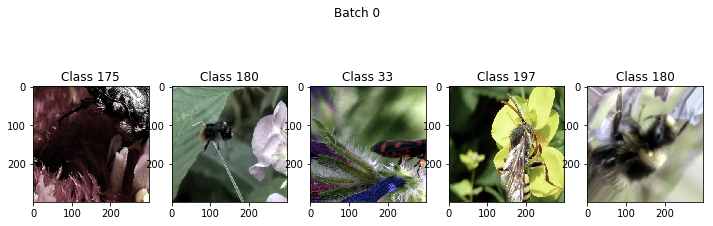

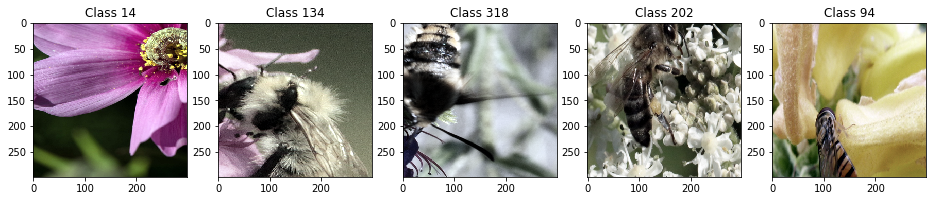

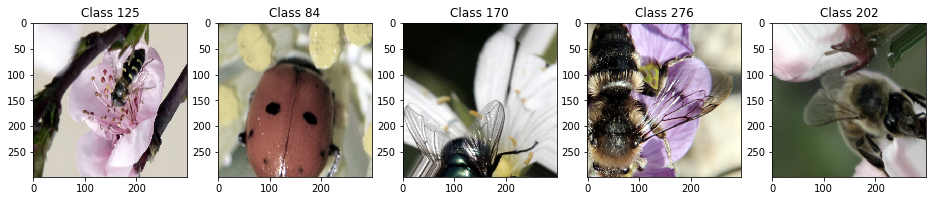

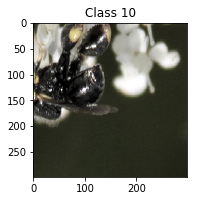

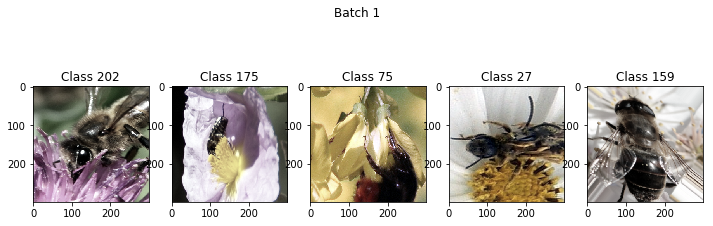

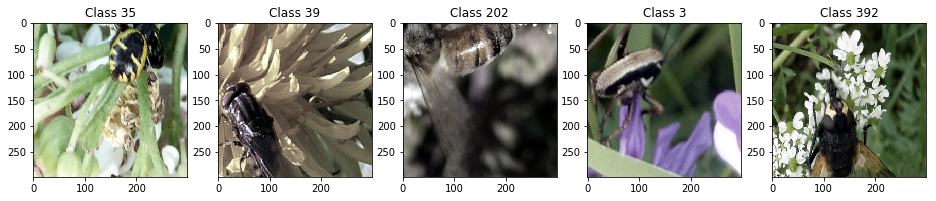

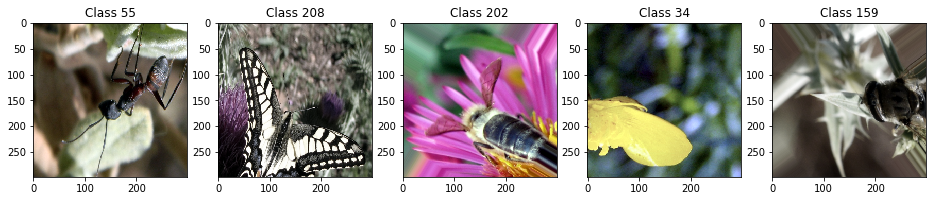

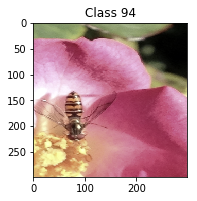

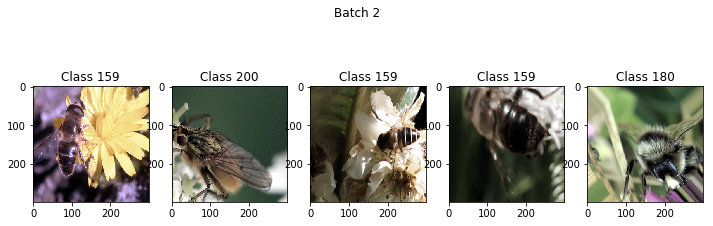

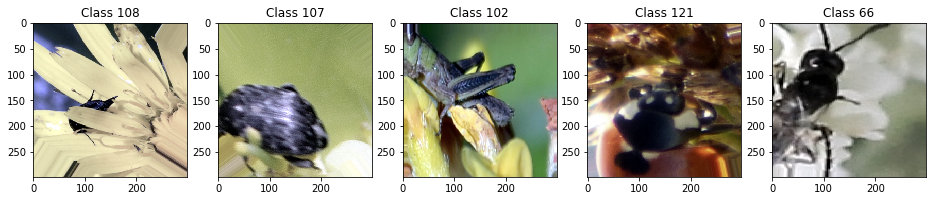

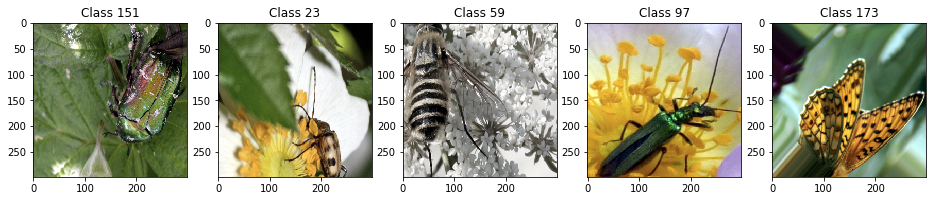

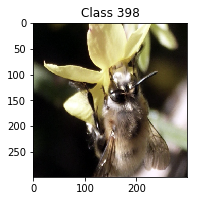

In [15]:
display_batches(train_batches_ds, max_batches=3)

In [ ]:
# max_count = 5
# n = 10

# with tqdm(total=max_count) as pbar:
#     for i, (batch_x, batch_y) in enumerate(train_batches_ds):
#         plt.figure(figsize=(16, 4))
#         plt.suptitle("Batch %i" % i)
#         for j in range(len(batch_x)):    
#             if j > 0 and j % n == 0:
#                 plt.figure(figsize=(16, 4))

#             x = batch_x[j, ...].cpu()
#             y = batch_y[j, ...]
#             plt.subplot(1, n, (j % n) + 1)
#             plt.imshow(scale_percentile(x.numpy().transpose([1, 2, 0])))
#             plt.title("Class %i" % y)
#             plt.axis('off')

#         pbar.update(1)
#         sys.stdout.flush()

#         max_count -= 1 
#         if max_count == 0:
#             break
        

## Check training phase

In [9]:
ic.batch_size = 4
ic.n_epochs = 2
ic.n_workers = 2
ic.n_splits = 7

In [10]:
train_batches_ds, val_batches_ds = ic._get_trainval_datasets(img_loader, n_splits=7, batch_size=16, num_workers=2)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
from torch import nn
from torch.optim import Adam

criterion = nn.CrossEntropyLoss().cuda()
optimizer = Adam(ic.net.parameters(), lr=0.001)

ic._train_one_epoch(ic.net, train_batches_ds, criterion, optimizer, 0, 1)

Epoch: 1/1:   1%|          | 20/2493 [00:03<06:44,  6.11it/s, Loss 5.9445 | Prec@1 3.750 | Prec@5 10.625]Process Process-2:
Traceback (most recent call last):
Process Process-1:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 40, in _worker_loop
  File "../submissions/pytorch_SqueezeNet_finetunning_imbalanced_299/image_classifier.p

In [15]:
import torch

HAS_GPU: True


In [19]:
x = torch.randn(3,256, 256)
y = torch.randn(3,257, 256)
z = torch.cat([x,y], 0)

RuntimeError: inconsistent tensor sizes at /pytorch/torch/lib/TH/generic/THTensorMath.c:2709

In [16]:
x = torch.autograd.Variable(x)
y = torch.autograd.Variable(y)
z = torch.cat([x,y], 0)

NameError: name 'x' is not defined

In [9]:
ic.batch_size = 12
ic.n_epochs = 2
ic.n_workers = 2
ic.n_splits = 7

In [10]:
ic.fit(img_loader)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)
Epoch: 1/2:  34%|###4      | 1134/3324 [06:02<11:40,  3.13it/s, Loss 2.6616 | Prec@1 45.294 | Prec@5 67.812]Process Process-1:
Process Process-2:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", li

KeyboardInterrupt: 

In [1]:
a = 1

In [8]:
import torch
from torch.autograd import Variable
from torch.nn import AdaptiveAvgPool2d, Linear, Sequential, Module
from torchvision.models import densenet161, DenseNet


class Flatten(Module):
    def forward(self, x):
        return x.view(x.size(0), -1)
    
# net = DenseNet161PollenatingInsects()

In [9]:
densenet = densenet161(pretrained=True)

features = densenet.features

classifier = Sequential(
    AdaptiveAvgPool2d(1),
    Flatten(),
    Linear(densenet.classifier.in_features, 403)
)


In [49]:
x = torch.randn(4, 3, 299, 299)

x = Variable(x, requires_grad=True)

x1 = features(x)
y = classifier(x1)

In [50]:
y.size()

torch.Size([4, 403])

In [32]:
x1.size()

torch.Size([4, 2208, 9, 9])

In [45]:
x2 = AdaptiveAvgPool2d(1)(x1)
x2 = x2.view(x2.size(0), -1)

In [40]:
x2.size()

torch.Size([4, 2208])

In [41]:
densenet.classifier.in_features

2208

In [43]:
x3 = Linear(densenet.classifier.in_features, 403)(x2)

In [44]:
x3.size()

torch.Size([4, 403])

Check test ds

Check DataLoader

In [1]:
import torch
import torch.utils.data

class DS(object):
    def __getitem__(self, idx):
        return torch.rand(3, 640, 640).cuda()
    def __len__(self):
        return 2000

ds = DS()
it = torch.utils.data.DataLoader(ds, batch_size=500, num_workers=1)

for i, data in enumerate(it):
    print(i)

0
1
2
3


In [3]:
import os, sys
sys.path.append("../submissions")
sys.path.append("..")

from pytorch_DenseNet161_finetunning_imbalanced.image_classifier import ResizedDataset, TransformedDataset, OnGPUDataLoader


HAS_GPU: True


In [1]:
import torch
import torch.utils.data

class DS(object):
    def __getitem__(self, idx):
        return torch.rand(3, 640, 640)
    def __len__(self):
        return 2000

ds = DS()
it = torch.utils.data.DataLoader(ds, batch_size=500, num_workers=1)

for i, data in enumerate(it):
    print(i)

0
1
2
3


Check data augmentations serialization

In [1]:
from torchvision.transforms import Compose, Normalize, ToTensor

In [2]:
class RandomOrder:

    def __init__(self, transforms):
        assert transforms is not None
        self.transforms = transforms

    def __call__(self, img):
        order = np.random.permutation(len(self.transforms))
        for i in order:
            img = self.transforms[i](img)
        return img


class RandomChoice:

    def __init__(self, transforms):
        assert transforms is not None
        self.transforms = transforms

    def __call__(self, img):
        c = np.random.choice(len(self.transforms), 1)[0]
        return self.transforms[c](img)


class RandomFlip:

    def __init__(self, proba=0.5, mode='h'):
        assert mode in ['h', 'v']
        self.mode = mode
        self.proba = proba

    def __call__(self, img):
        if self.proba > np.random.rand():
            return img
        flipCode = 1 if self.mode == 'h' else 0
        return cv2.flip(img, flipCode)


class RandomCrop:

    def __init__(self, size, padding=0):
        assert len(size) == 2
        self.size = size
        self.padding = padding

    @staticmethod
    def get_params(img, output_size):
        h, w, _ = img.shape
        th, tw = output_size
        if w == tw and h == th:
            return 0, 0, h, w
        i = np.random.randint(0, h - th)
        j = np.random.randint(0, w - tw)
        return i, j, th, tw

    def __call__(self, img):
        if self.padding > 0:
            img = np.pad(img, self.padding, mode='edge')
        i, j, h, w = self.get_params(img, self.size)
        return img[i:i + h, j:j + w, :]


class RandomAffine:

    def __init__(self, rotation=(-90, 90), scale=(0.85, 1.15), translate=(0.2, 0.2)):
        self.rotation = rotation
        self.scale = scale
        self.translate = translate

    def __call__(self, img):
        scale = np.random.uniform(self.scale[0], self.scale[1])
        deg = np.random.uniform(self.rotation[0], self.rotation[1])
        max_dx = self.translate[0] * img.shape[1]
        max_dy = self.translate[1] * img.shape[0]
        dx = np.round(np.random.uniform(-max_dx, max_dx))
        dy = np.round(np.random.uniform(-max_dy, max_dy))
        center = (img.shape[1::-1] * np.array((0.5, 0.5))) - 0.5
        transform_matrix = cv2.getRotationMatrix2D(tuple(center), deg, scale)
        # Apply shift :
        transform_matrix[0, 2] += dx
        transform_matrix[1, 2] += dy
        ret = cv2.warpAffine(img, transform_matrix, img.shape[1::-1],
                             flags=cv2.INTER_LINEAR,
                             borderMode=cv2.BORDER_REPLICATE)
        if img.ndim == 3 and ret.ndim == 2:
            ret = ret[:, :, np.newaxis]
        return ret

In [6]:
SIZE = (299, 299)
mean_val = [0.485, 0.456, 0.406]
std_val = [0.229, 0.224, 0.225]

In [7]:
train_transforms = Compose([
    RandomCrop(SIZE),
    # Geometry
    RandomChoice([
        RandomAffine(rotation=(-60, 60), scale=(0.95, 1.05), translate=(0.05, 0.05)),
        RandomFlip(proba=0.5, mode='h'),
        RandomFlip(proba=0.5, mode='v'),
    ]),
    # Color
    # RandomChoice([
    #    RandomAdd(value=(-10, 10), per_channel=0),
    #    RandomAdd(value=(-10, 10), per_channel=1),
    #    RandomAdd(value=(-10, 10), per_channel=2),
    #    RandomAdd(value=(-10, 10))
    # ]),
    # To Tensor (float, CxHxW, [0.0, 1.0]) + Normalize
    ToTensor(),
    Normalize(mean_val, std_val)
])


In [12]:
train_transforms.__class__.__name__

'Compose'

In [16]:
import json

def to_json(transforms):
    serialization = lambda o: {o.__class__.__name__: o.__dict__}
    return json.dumps(transforms, default=serialization)    

In [19]:
train_transforms_json = to_json(train_transforms)
train_transforms_json

'{"Compose": {"transforms": [{"RandomCrop": {"padding": 0, "size": [299, 299]}}, {"RandomChoice": {"transforms": [{"RandomAffine": {"translate": [0.05, 0.05], "rotation": [-60, 60], "scale": [0.95, 1.05]}}, {"RandomFlip": {"mode": "h", "proba": 0.5}}, {"RandomFlip": {"mode": "v", "proba": 0.5}}]}}, {"ToTensor": {}}, {"Normalize": {"std": [0.229, 0.224, 0.225], "mean": [0.485, 0.456, 0.406]}}]}}'

In [67]:
from torchvision import transforms

<module 'torchvision.transforms' from '/usr/local/lib/python2.7/dist-packages/torchvision/transforms.pyc'>

In [68]:
dict([(name, cls) for name, cls in transforms.__dict__.items() if isinstance(cls, type)])

{'CenterCrop': torchvision.transforms.CenterCrop,
 'Compose': torchvision.transforms.Compose,
 'Lambda': torchvision.transforms.Lambda,
 'Normalize': torchvision.transforms.Normalize,
 'Pad': torchvision.transforms.Pad,
 'RandomCrop': torchvision.transforms.RandomCrop,
 'RandomHorizontalFlip': torchvision.transforms.RandomHorizontalFlip,
 'RandomSizedCrop': torchvision.transforms.RandomSizedCrop,
 'Scale': torchvision.transforms.Scale,
 'ToPILImage': torchvision.transforms.ToPILImage,
 'ToTensor': torchvision.transforms.ToTensor}

In [58]:
GLOBAL_TRANSFORMS = {
    "Compose": Compose,
    "ToTensor": ToTensor,
    "Normalize": Normalize
}

CUSTOM_TRANSFORMS = {
    "RandomCrop": RandomCrop,
    "RandomChoice": RandomChoice,
    "RandomAffine": RandomAffine,
    "RandomFlip": RandomFlip,    
}

def object_hook(decoded_dict):
    if len(decoded_dict) > 1: 
        # decoded_dict contains kwargs and not class name
        return decoded_dict
    for k in decoded_dict:        
        # assert k in GLOBAL_TRANSFORMS or k in CUSTOM_TRANSFORMS, "Key '%s' is unknown" % k      
        if k in GLOBAL_TRANSFORMS:
            print("Instanciate : {} with kwargs: {}"
                  .format(GLOBAL_TRANSFORMS[k], decoded_dict[k]))
            return GLOBAL_TRANSFORMS[k](**decoded_dict[k]) if decoded_dict[k] is not None else GLOBAL_TRANSFORMS[k]()
        elif k in CUSTOM_TRANSFORMS:
            print("Instanciate : {} with kwargs: {}"
                  .format(CUSTOM_TRANSFORMS[k], decoded_dict[k]))
            return CUSTOM_TRANSFORMS[k](**decoded_dict[k]) if decoded_dict[k] is not None else CUSTOM_TRANSFORMS[k]()
        return decoded_dict            

In [59]:
def restore_transform(json_str, class_dict=None):
    return json.loads(json_str, object_hook=object_hook)

In [61]:
train_transforms2 = restore_transform(train_transforms_json)

Instanciate : __main__.RandomCrop with kwargs: {u'padding': 0, u'size': [299, 299]}
Instanciate : __main__.RandomAffine with kwargs: {u'rotation': [-60, 60], u'translate': [0.05, 0.05], u'scale': [0.95, 1.05]}
Instanciate : __main__.RandomFlip with kwargs: {u'mode': u'h', u'proba': 0.5}
Instanciate : __main__.RandomFlip with kwargs: {u'mode': u'v', u'proba': 0.5}
Instanciate : __main__.RandomChoice with kwargs: {u'transforms': [<__main__.RandomAffine instance at 0x7f257c2fdfc8>, <__main__.RandomFlip instance at 0x7f257c2fd830>, <__main__.RandomFlip instance at 0x7f257c2ef560>]}
Instanciate : <class 'torchvision.transforms.ToTensor'> with kwargs: None
Instanciate : <class 'torchvision.transforms.Normalize'> with kwargs: {u'std': [0.229, 0.224, 0.225], u'mean': [0.485, 0.456, 0.406]}
Instanciate : <class 'torchvision.transforms.Compose'> with kwargs: {u'transforms': [<__main__.RandomCrop instance at 0x7f257c2fdcf8>, <__main__.RandomChoice instance at 0x7f257c2ef2d8>, <torchvision.transfo

In [62]:
train_transforms2